# 0. Introducción

<!-- <img src="https://raw.githubusercontent.com/JoePortilla/EnergyProductionCol-EDA/main/img/energyproduction_eda_cover.webp?token=GHSAT0AAAAAAB6AMADC5TFIULPHAY4XD3FUZBR77PA" width="800" alt="logo" style="display:block;margin:auto;"> -->



## Objetivo general
Work in progress.

## Objetivo especifico
Este notebook se centra en explorar y visualizar el conjunto de datos.

## Paquetes utilizados
- Procesamiento de datos
    - Pandas.
- Procesamiento numérico.
    - NumPy
- Visualización de datos
    - Seaborn
    - Matplotlib.

## Dataset

## Referencias

## Instructor
Joseph Santiago Portilla - Ingeniero Electrónico.
- GitHub: https://github.com/JoePortilla
- Twitter: https://twitter.com/JoePortilla
- LinkedIn: https://www.linkedin.com/in/PortillaJoe
- Kaggle: https://www.kaggle.com/joeportilla


# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [2]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# 2. Carga de Dataset y Revisión inicial

## 2.1. Lectura de CSV

In [3]:
df0 = pd.read_csv('/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv')

## 2.2. Exploración inicial del dataframe

### Info. general del dataset

El conjunto de datos contiene las siguientes variables:

Company Name: Company
Location: Location of the Launch
Datum: Datum and Time of Launch
Detail: Rocket Name
Status Rocket: Status of the rocket
Rocket: Cost of the mission: in $ million
Status Mission: Status of the mission

In [4]:
df0.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [5]:
df0.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


### Dimensión del datafrane

In [7]:
df0.shape

(4324, 9)

# 3. Preprocesamiento

In [8]:
df = df0.copy()

## 3.1. Feature selection

In [9]:
filt = ['Unnamed: 0', 'Unnamed: 0.1']
df.drop(filt, axis=1, inplace=True)

In [10]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## 3.2. Column renaming

In [11]:
df.rename(columns={'Company Name':'company',
                   'Location':'launch_facility',
                   'Datum':'date',
                   'Detail':'detail',
                   'Status Rocket':'rocket_status',
                   ' Rocket':'cost',
                   'Status Mission':'mission_status'},
          inplace=True)

## 3.3. Data filtering

-

## 3.4. Feature conversion

### 3.4.1. Fecha

Eliminar los caracteres ' UTC' de los registros de fecha

In [12]:
df['date'] = df['date'].str.replace(' UTC', '')

Debido a que hay formatos combinados en los registros de fecha se crea una función para poder convertirlos a tipo `datetime`

In [13]:
def date_formator(date):
    if ':' in date:
        return pd.to_datetime(date, format='%a %b %d, %Y %H:%M')
    else:
        return pd.to_datetime(date, format='%a %b %d, %Y')

Convertir columna `date` a tipo datetime

In [14]:
df['date'] = df['date'].apply(date_formator)

### 3.4.2. Costo

Convertir los registros de costo a tipo `float`. Para evitar inconvenientes en la conversión se elimina el caracter `,` que representa los millares en el costo.

In [15]:
df['cost'] = df['cost'].str.replace(',', '')
df['cost'] = df['cost'].astype(float)

## 3.5. Feature construction

### 3.5.1. Año y mes

Crear columna de año y mes

In [16]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

### 3.5.2. Ubicación lanzamiento

Crear columna con la ubicación del lanzamiento, a partir del centro de lanzamiento

In [17]:
df['launch_location'] = df['launch_facility'].str.split(', ').str[-1]

### 3.5.3. Cohete y payload

Dividir la columna `detail` en dos. Una para el nombre del cohete `rocket` y otra para la carga `payload` que lleva.

In [18]:
df[['rocket', 'payload']] = df['detail'].str.split('|', expand=True)
df.drop('detail', axis=1, inplace=True)

## 3.6. Value renaming

Renombrar los sitios de lanzamiento, a su ubicación en el respectivos País

In [19]:
countries_dict = {
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russia',
    "Gran Canaria": 'USA'
}

df['launch_location'] = df['launch_location'].replace(countries_dict)

## 3.7. Data reordering

In [20]:
df = df.sort_values('date')
df = df.reset_index(drop=True)

## 3.8. Dataframe preprocesado

In [21]:
df.head(3)

,company,launch_facility,date,rocket_status,cost,mission_status,year,month,launch_location,rocket,payload
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00,StatusRetired,NaN,Success,1957,10,Kazakhstan,Sputnik 8K71PS,Sputnik-1
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,StatusRetired,NaN,Success,1957,11,Kazakhstan,Sputnik 8K71PS,Sputnik-2
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,StatusRetired,NaN,Failure,1957,12,USA,Vanguard,Vanguard TV3


In [22]:
df.tail(3)

,company,launch_facility,date,rocket_status,cost,mission_status,year,month,launch_location,rocket,payload
4321,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,StatusActive,NaN,Success,2020,8,USA,Starship Prototype,150 Meter Hop
4322,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,StatusActive,29.75,Success,2020,8,China,Long March 2D,Gaofen-9 04 & Q-SAT
4323,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,StatusActive,50.00,Success,2020,8,USA,Falcon 9 Block 5,Starlink V1 L9 & BlackSky


In [23]:
df.shape

(4324, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   company          4324 non-null   object        
 1   launch_facility  4324 non-null   object        
 2   date             4324 non-null   datetime64[ns]
 3   rocket_status    4324 non-null   object        
 4   cost             964 non-null    float64       
 5   mission_status   4324 non-null   object        
 6   year             4324 non-null   int64         
 7   month            4324 non-null   int64         
 8   launch_location  4324 non-null   object        
 9   rocket           4324 non-null   object        
 10  payload          4324 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 371.7+ KB


Comprobación de valores faltantes

In [25]:
df.isnull().sum(axis=0)

company               0
launch_facility       0
date                  0
rocket_status         0
cost               3360
mission_status        0
year                  0
month                 0
launch_location       0
rocket                0
payload               0
dtype: int64

In [26]:
df['company'].unique()

array(['RVSN USSR', 'US Navy', 'AMBA', 'US Air Force', 'NASA',
       'General Dynamics', 'Martin Marietta', "Arm??e de l'Air", 'UT',
       'ASI', 'OKB-586', 'CECLES', 'Yuzhmash', 'CASC', 'CNES',
       'Roscosmos', 'ISAS', 'RAE', 'MHI', 'ISRO', 'ESA', 'Arianespace',
       'IAI', 'Boeing', 'Douglas', 'Northrop', 'Lockheed', 'VKS RF',
       'MITT', 'ILS', 'EER', 'AEB', 'SRC', 'KCST', 'Sea Launch',
       'Kosmotras', 'Eurockot', 'CASIC', 'Starsem', 'SpaceX', 'ULA',
       'Land Launch', 'ISA', 'KARI', 'JAXA', 'Khrunichev', 'Blue Origin',
       'Sandia', 'ExPace', 'Rocket Lab', 'Exos', 'Landspace', 'OneSpace',
       'i-Space', 'IRGC', 'Virgin Orbit'], dtype=object)

In [27]:
df['launch_location'].unique()

array(['Kazakhstan', 'USA', 'Russia', 'France', 'Japan', 'Kenya',
       'Australia', 'China', 'India', 'Israel', 'Brazil', 'North Korea',
       'Pacific Ocean', 'Iran', 'South Korea', 'New Zealand'],
      dtype=object)

# 4. Análisis de cohetes

In [28]:
# df['rocket_status'].value_counts()
ds = df.groupby('rocket_status').size()
ds = ds.reset_index(name='conteo')
ds

,rocket_status,conteo
0,StatusActive,790
1,StatusRetired,3534


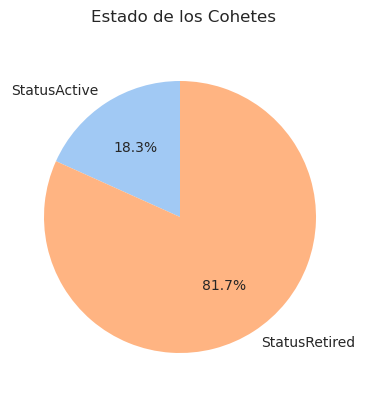

In [29]:
fig, ax = plt.subplots(figsize=(4, 4))
fig.suptitle('Estado de los Cohetes')

ax.pie(x=ds['conteo'], labels=ds['rocket_status'], autopct='%.1f%%', startangle=90, colors=sns.color_palette("pastel"))

plt.tight_layout()

## Success rocket analysis

## Failure rocket analysis

# 5. Análisis de misiones

## Evolución del número de misiones

In [30]:
ds = df.groupby('year').size()
ds = ds.reset_index(name='conteo')
ds.head()

,year,conteo
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52


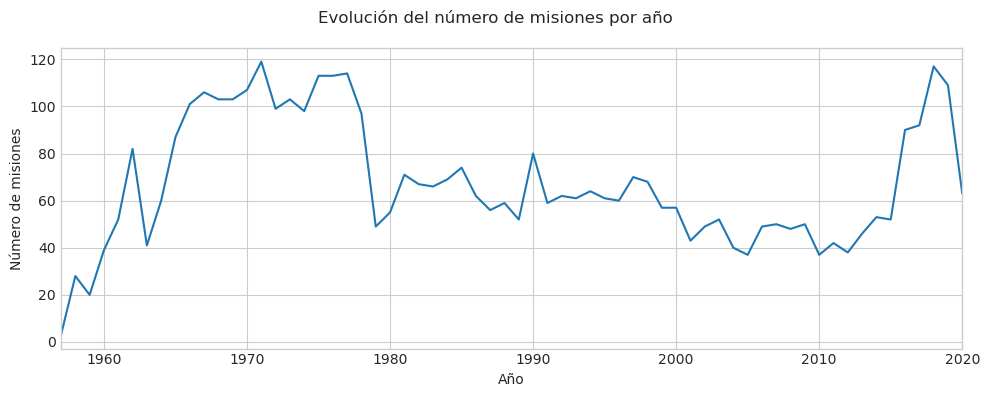

In [31]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución del número de misiones por año')

sns.lineplot(data=ds, x='year', y='conteo')
ax.set_xlabel('Año')
ax.set_ylabel('Número de misiones')
ax.set_xlim(1957, 2020)

plt.tight_layout()

## Estado de las misiones

In [32]:
ds = df.groupby('mission_status').size()
ds = ds.reset_index(name='conteo')
ds

,mission_status,conteo
0,Failure,339
1,Partial Failure,102
2,Prelaunch Failure,4
3,Success,3879


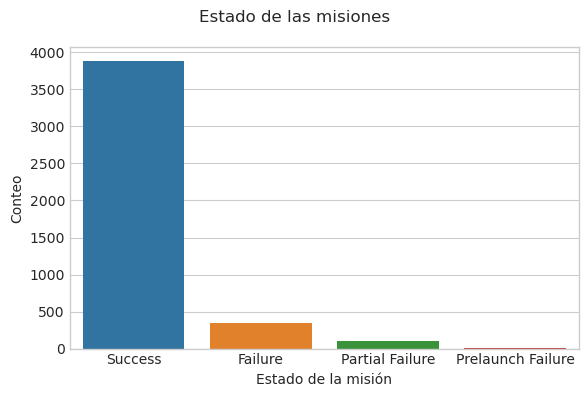

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Estado de las misiones')

sns.countplot(data=df, x='mission_status', ax=ax)
ax.set_xlabel('Estado de la misión')
ax.set_ylabel('Conteo')

plt.tight_layout()

how many launches made every company

Space Company with the most successful missions

Space Company with the most failed missions

# 6. Análisis de Costo

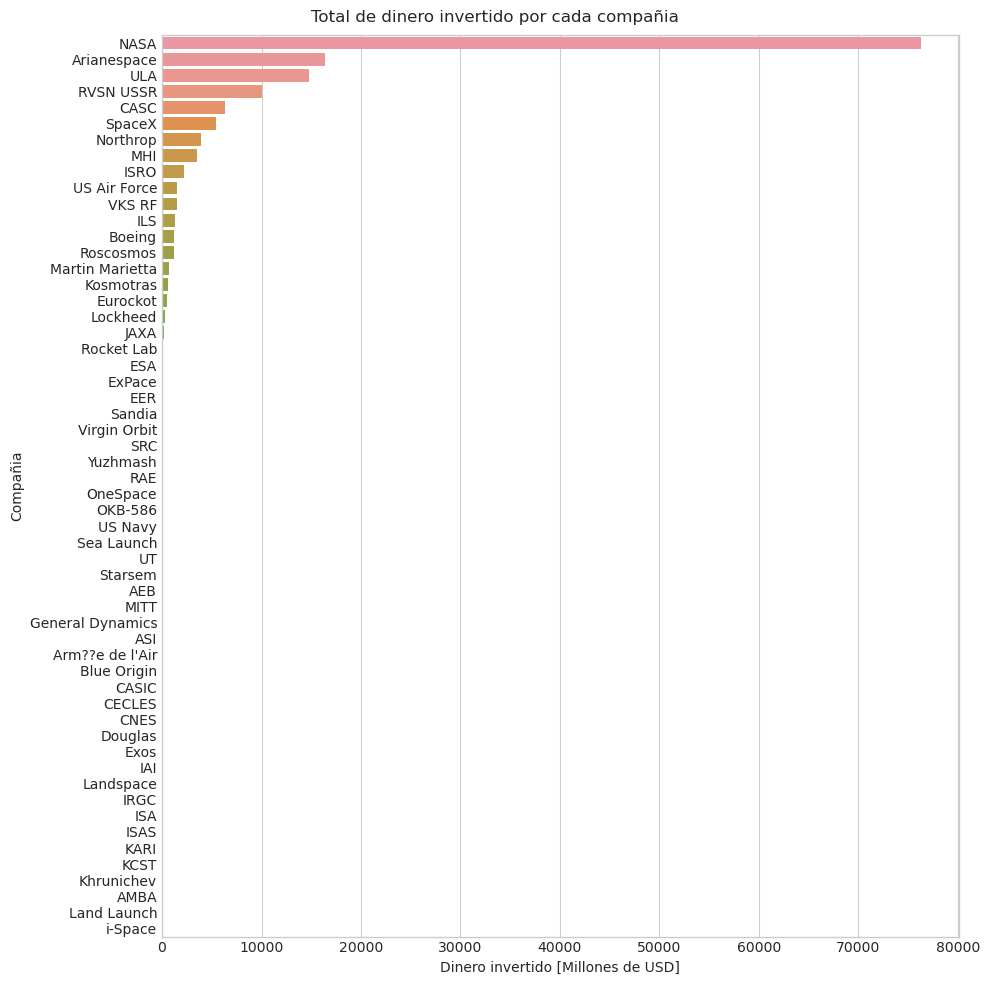

In [34]:
order = df.groupby('company').sum()['cost'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Total de dinero invertido por cada compañia')

sns.barplot(data=df, y='company', x='cost', ax=ax, estimator='sum', errorbar=None, order=order)
ax.set_xlabel('Dinero invertido [Millones de USD]')
ax.set_ylabel('Compañia')

plt.tight_layout()

average price per launch for every yea

# X. Conclusiones EDA

- Work in progress
-  